### Import libraries

In [123]:
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

### Function to implement gradient descent (GD) algorithm and Adam's optimization algorithm 

In [124]:
def grad_descent_mult(df,x_prev,learn_rate):
    
    epsilon = 0.0001
    grad_itter = 1
    
    seq_x = [x_prev[0]]
    seq_y = [x_prev[1]]

    x_next = np.subtract(x_prev, learn_rate*df(x_prev[0],x_prev[1]))
    seq_x = np.append(seq_x, x_next[0])
    seq_y = np.append(seq_y, x_next[1])
    
    while np.linalg.norm(np.subtract(x_next,x_prev)) > epsilon:
        
        x_prev = x_next
        x_next = x_prev - learn_rate*df(x_prev[0],x_prev[1])
        grad_itter += 1
        seq_x = np.append(seq_x, x_next[0])
        seq_y = np.append(seq_y, x_next[1])
    
    return (x_next, grad_itter, seq_x,seq_y)

In [126]:
def adam_mult(df, x_prev, learn_rate, beta_1=0.9, beta_2=0.999, e=1e-8):
    
    epsilon = 0.0001
    grad_itter = 1

    seq_x = [x_prev[0]]
    seq_y = [x_prev[1]]
    
    #x_next = np.subtract(x_prev, learn_rate*df(x_prev[0],x_prev[1]))
    first_moment = np.array([0, 0])
    second_moment = np.array([0, 0])
    first_unbias = np.array([0, 0])
    second_unbias = np.array([0, 0])

    first_moment = beta_1 * first_moment + (1 - beta_1)*df(*x_prev)
    second_moment = beta_2 * second_moment + (1 - beta_2)*df(*x_prev)**2
    first_unbias = first_moment / (1 - beta_1**grad_itter)
    second_unbias = second_moment / (1 - beta_2**grad_itter)

    x_next = x_prev - learn_rate * first_unbias / (np.sqrt(second_unbias) + e)
    

    while np.linalg.norm(np.subtract(x_next,x_prev)) > epsilon:
    
        x_prev = x_next 
        
        first_moment = beta_1 * first_moment + (1 - beta_1)*df(*x_prev)
        second_moment = beta_2 * second_moment + (1 - beta_2)*df(*x_prev)**2
        first_unbias = first_moment / (1 - beta_1**grad_itter)
        second_unbias = second_moment / (1 - beta_2**grad_itter)
        
        x_next = x_prev - learn_rate * first_unbias / (np.sqrt(second_unbias) + e)
        
        seq_x = np.append(seq_x, x_next[0])
        seq_y = np.append(seq_y, x_next[1])

        grad_itter += 1
    
    return (x_next, grad_itter, seq_x, seq_y)

### Arbitrary function of two variables

__Objective function__:
$$f(x,y) = 3x^2 + 5y^2 - 4xy - 2x - 4y + 12.$$ 

__Partial derivatives__:

$$\frac{df(x)}{dx} = f_{x} = 6x-4y-2 \text{  and  } \frac{df(y)}{dy} = f_{y} = -4x+10y-4.$$ 

/var/folders/ft/5vplhl0d36b0qq16wf5p_mbh0000gn/T/ipykernel_5001/3629782825.py:12: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


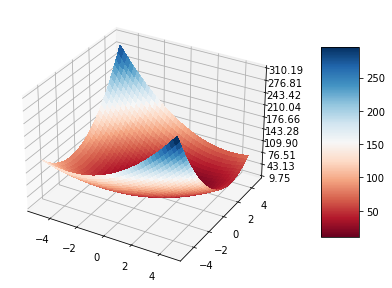

In [127]:
#set objective function
def f(x,y):
    return 3*x**2 + 5*y**2 - 4*x*y - 2*x - 4*y + 12

#plot function
x = np.arange(-5, 5, 0.25)
y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(x, y)
Z = f(X,Y)

fig = plt.figure(1, figsize = (15, 5))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                      cmap=cm.RdBu,linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(surf, shrink = 0.7, aspect=5)
plt.show()

In [128]:
def dfdx(x,y):
    return 6*x-4*y-2

def dfdy(x,y):
    return -4*x+10*y-4

# gradient vector [df/dx, df/dy]
def grad_vector(x,y):
    return np.array([dfdx(x,y), dfdy(x,y)])

### Implement the search for its minimum

##### using gradient descent (GD) algorithm 

Minimum (x,y) from gradient descent: [0.81590346 0.72586462]
Number of gradient descent iterations: 167


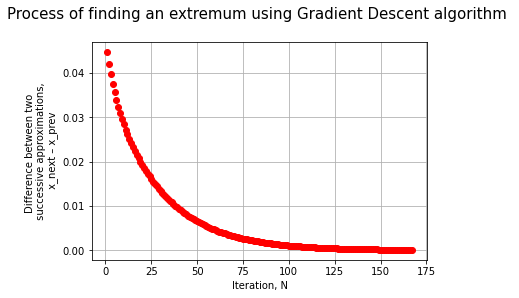

In [129]:
grad_output = grad_descent_mult(grad_vector, np.array([0,0]), 0.01)

print('Minimum (x,y) from gradient descent: %s' %grad_output[0])
print('Number of gradient descent iterations: %s' %grad_output[1])

euc_dist = [np.linalg.norm(np.array([grad_output[2][i],grad_output[3][i]])-np.array([grad_output[2][i-1],grad_output[3][i-1]])) for i in range(1,grad_output[1]+1)]
plt.grid()
plt.title("Process of finding an extremum using Gradient Descent algorithm \n", fontsize = 15)
plt.xlabel("Iteration, N",fontsize = 10)
plt.ylabel("Difference between two \n successive approximations, \n x_next – x_prev",fontsize = 10)
plt.plot(np.arange(1, grad_output[1]+1, 1), euc_dist, 'ro')

##### using Adam's optimization algorithm 

Minimum (x,y) from gradient descent: [0.81754874 0.72677278]
Number of gradient descent iterations: 184


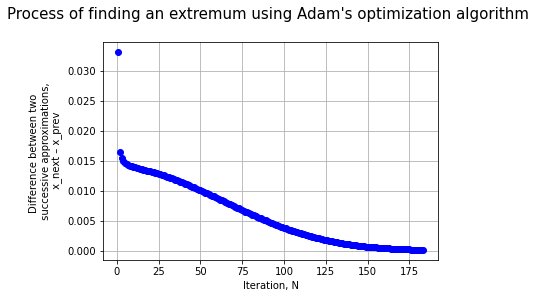

In [130]:
adam_output = adam_mult(grad_vector, np.array([0,0]), 0.01)

print('Minimum (x,y) from gradient descent: %s' %adam_output[0])
print('Number of gradient descent iterations: %s' %adam_output[1])

euc_dist = [np.linalg.norm(np.array([adam_output[2][i],adam_output[3][i]])-np.array([adam_output[2][i-1],adam_output[3][i-1]])) for i in range(1,adam_output[1])]
plt.grid()
plt.title("Process of finding an extremum using Adam's optimization algorithm \n", fontsize = 15)
plt.xlabel("Iteration, N",fontsize = 10)
plt.ylabel("Difference between two \n successive approximations, \n x_next – x_prev",fontsize = 10)
plt.plot(np.arange(1, adam_output[1], 1), euc_dist, 'bo')